In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50)


In [2]:
accidents=pd.read_csv(r'C:\Users\kefni\Car-Accidents-EDA\Data\US_Accidents_Dec21_updated.csv')

In [3]:
accidents.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [4]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [5]:
accidents.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [6]:
missing_val=accidents.isna().sum().sort_values(ascending=False)/len(accidents)

<AxesSubplot:>

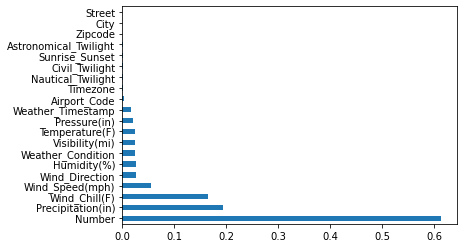

In [7]:
missing_val[missing_val!=0].plot.barh()

In [8]:
accidents.drop(['Number','Description','Zipcode','Airport_Code','Pressure(in)','Weather_Timestamp','Wind_Chill(F)',"Astronomical_Twilight","Nautical_Twilight","Civil_Twilight"], axis=1, inplace=True)

In [9]:
accidents.drop(accidents.loc[:, 'Amenity':'Turning_Loop'].columns, axis = 1,inplace=True)

In [10]:
accidents

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,City,County,State,Country,Timezone,Temperature(F),Humidity(%),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Outerbelt E,R,Dublin,Franklin,OH,US,US/Eastern,42.1,58.0,10.0,SW,10.4,0.00,Light Rain,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,I-70 E,R,Dayton,Montgomery,OH,US,US/Eastern,36.9,91.0,10.0,Calm,NaN,0.02,Light Rain,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,I-75 S,R,Cincinnati,Hamilton,OH,US,US/Eastern,36.0,97.0,10.0,Calm,NaN,0.02,Overcast,Night
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,I-77 N,R,Akron,Summit,OH,US,US/Eastern,39.0,55.0,10.0,Calm,NaN,NaN,Overcast,Night
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,I-75 S,R,Cincinnati,Hamilton,OH,US,US/Eastern,37.0,93.0,10.0,WSW,10.4,0.01,Light Rain,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,Pomona Fwy E,R,Riverside,Riverside,CA,US,US/Pacific,86.0,40.0,10.0,W,13.0,0.00,Fair,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,I-8 W,R,San Diego,San Diego,CA,US,US/Pacific,70.0,73.0,10.0,SW,6.0,0.00,Fair,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,Garden Grove Fwy,R,Orange,Orange,CA,US,US/Pacific,73.0,64.0,10.0,SSW,10.0,0.00,Partly Cloudy,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,San Diego Fwy S,R,Culver City,Los Angeles,CA,US,US/Pacific,71.0,81.0,10.0,SW,8.0,0.00,Fair,Day


In [11]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           int64  
 2   Start_Time         object 
 3   End_Time           object 
 4   Start_Lat          float64
 5   Start_Lng          float64
 6   End_Lat            float64
 7   End_Lng            float64
 8   Distance(mi)       float64
 9   Street             object 
 10  Side               object 
 11  City               object 
 12  County             object 
 13  State              object 
 14  Country            object 
 15  Timezone           object 
 16  Temperature(F)     float64
 17  Humidity(%)        float64
 18  Visibility(mi)     float64
 19  Wind_Direction     object 
 20  Wind_Speed(mph)    float64
 21  Precipitation(in)  float64
 22  Weather_Condition  object 
 23  Sunrise_Sunset     object 
dtypes: float64(10), int64(1), object(13)
memory usage:

In [12]:
accidents['Country'].unique()

array(['US'], dtype=object)

In [13]:
accidents['Wind_Direction'].unique()

array(['SW', 'Calm', 'WSW', 'WNW', 'West', 'NNW', 'South', 'W', 'NW',
       'North', 'SSE', 'SSW', 'ESE', 'SE', nan, 'East', 'Variable', 'NNE',
       'NE', 'ENE', 'CALM', 'S', 'VAR', 'N', 'E'], dtype=object)

In [14]:
accidents.drop(['Country','Wind_Direction'] ,axis=1, inplace=True)

In [15]:
accidents.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,City,County,State,Timezone,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Outerbelt E,R,Dublin,Franklin,OH,US/Eastern,42.1,58.0,10.0,10.4,0.00,Light Rain,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,I-70 E,R,Dayton,Montgomery,OH,US/Eastern,36.9,91.0,10.0,NaN,0.02,Light Rain,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,I-75 S,R,Cincinnati,Hamilton,OH,US/Eastern,36.0,97.0,10.0,NaN,0.02,Overcast,Night
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,I-77 N,R,Akron,Summit,OH,US/Eastern,39.0,55.0,10.0,NaN,NaN,Overcast,Night
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,I-75 S,R,Cincinnati,Hamilton,OH,US/Eastern,37.0,93.0,10.0,10.4,0.01,Light Rain,Day


In [16]:
accidents['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Sand',
       'Ligh

In [17]:
accidents['Start_Time']=pd.to_datetime(accidents['Start_Time'])

In [18]:
accidents['End_Time']=pd.to_datetime(accidents['End_Time'])

In [19]:
accidents['Side'].value_counts()/len(accidents)

R    8.270742e-01
L    1.729254e-01
N    3.514516e-07
Name: Side, dtype: float64

In [20]:
accidents.drop('Side', axis = 1,inplace=True)

In [21]:
accidents

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,City,County,State,Timezone,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Outerbelt E,Dublin,Franklin,OH,US/Eastern,42.1,58.0,10.0,10.4,0.00,Light Rain,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,I-70 E,Dayton,Montgomery,OH,US/Eastern,36.9,91.0,10.0,NaN,0.02,Light Rain,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,I-75 S,Cincinnati,Hamilton,OH,US/Eastern,36.0,97.0,10.0,NaN,0.02,Overcast,Night
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,I-77 N,Akron,Summit,OH,US/Eastern,39.0,55.0,10.0,NaN,NaN,Overcast,Night
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,I-75 S,Cincinnati,Hamilton,OH,US/Eastern,37.0,93.0,10.0,10.4,0.01,Light Rain,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,Pomona Fwy E,Riverside,Riverside,CA,US/Pacific,86.0,40.0,10.0,13.0,0.00,Fair,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,I-8 W,San Diego,San Diego,CA,US/Pacific,70.0,73.0,10.0,6.0,0.00,Fair,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,Garden Grove Fwy,Orange,Orange,CA,US/Pacific,73.0,64.0,10.0,10.0,0.00,Partly Cloudy,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,San Diego Fwy S,Culver City,Los Angeles,CA,US/Pacific,71.0,81.0,10.0,8.0,0.00,Fair,Day


In [22]:
accidents.isna().sum().sort_values(ascending=False)

Precipitation(in)    549458
Wind_Speed(mph)      157944
Humidity(%)           73092
Weather_Condition     70636
Visibility(mi)        70546
Temperature(F)        69274
Timezone               3659
Sunrise_Sunset         2867
City                    137
Street                    2
Severity                  0
County                    0
State                     0
Distance(mi)              0
End_Lng                   0
End_Lat                   0
Start_Lng                 0
Start_Lat                 0
End_Time                  0
Start_Time                0
ID                        0
dtype: int64

C:\Users\kefni\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


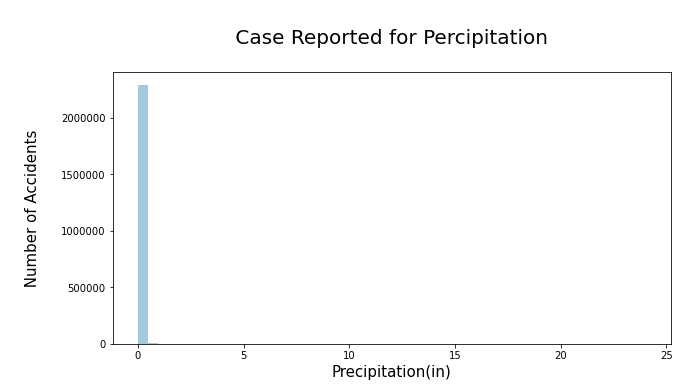

In [23]:
plt.figure(figsize=(10,5))
plt.title('\n Case Reported for Percipitation \n', size=20)
plt.ylabel('\n Number of Accidents \n', fontsize=15)
plt.xlabel('\n Precipitation(in)\n', fontsize=15)
sns.distplot(accidents["Precipitation(in)"],kde=False)
plt.ticklabel_format(style='plain', axis='y')

<AxesSubplot:title={'center':'\n Case Reported for Visibility \n'}, xlabel='Visibility(mi)', ylabel='\n Number of Accidents \n'>

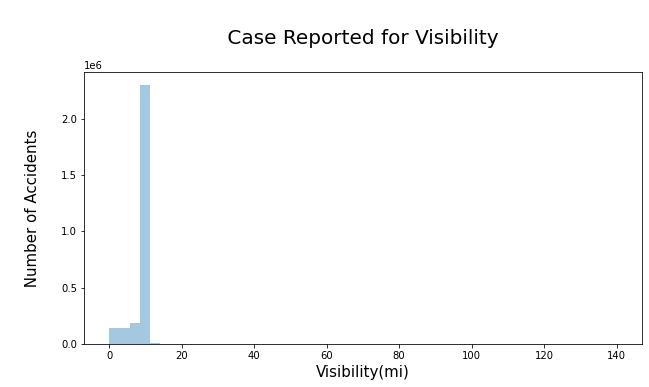

In [24]:
plt.figure(figsize=(10,5))
plt.title('\n Case Reported for Visibility \n', size=20)
plt.ylabel('\n Number of Accidents \n', fontsize=15)
plt.xlabel('\n Visibility(mi)\n', fontsize=15)
sns.distplot(accidents["Visibility(mi)"],kde=False) 

<AxesSubplot:title={'center':'\n Case Reported for Temperature \n'}, xlabel='Temperature(F)', ylabel='\n Number of Accidents \n'>

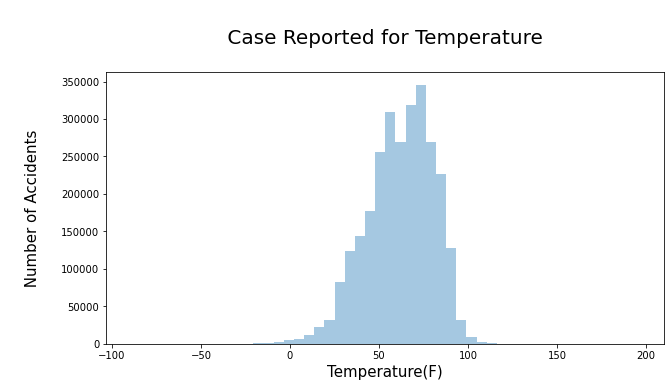

In [25]:
plt.figure(figsize=(10,5))
plt.title('\n Case Reported for Temperature \n', size=20)
plt.ylabel('\n Number of Accidents \n', fontsize=15)
plt.xlabel('\n Temperature(F)\n', fontsize=15)
sns.distplot(accidents["Temperature(F)"],kde=False) 

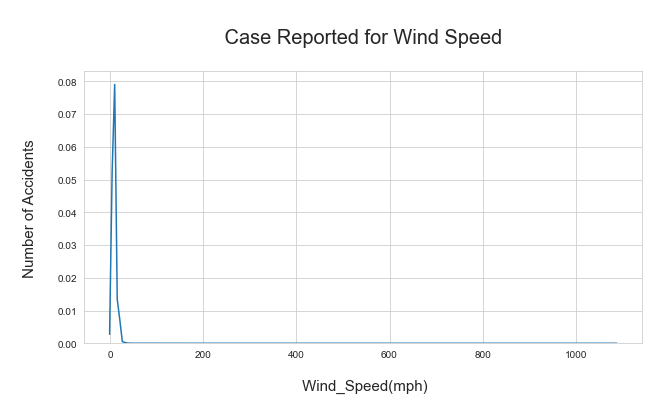

In [49]:
plt.figure(figsize=(10,5))
plt.title('\n Case Reported for Wind Speed \n', size=20)
plt.ylabel('\n Number of Accidents \n', fontsize=15)
plt.xlabel('\n Wind_Speed(mph)\n', fontsize=15)
sns.kdeplot(accidents["Wind_Speed(mph)"])
plt.ticklabel_format(style='plain', axis='y')

In [27]:
accidents.dropna(subset=['Temperature(F)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Sunrise_Sunset','Timezone','City','Street','Weather_Condition','Humidity(%)'],inplace=True)

In [28]:
accidents

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,City,County,State,Timezone,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Outerbelt E,Dublin,Franklin,OH,US/Eastern,42.1,58.0,10.0,10.4,0.00,Light Rain,Night
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,I-75 S,Cincinnati,Hamilton,OH,US/Eastern,37.0,93.0,10.0,10.4,0.01,Light Rain,Day
7,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,I-71 S,Cleveland,Cuyahoga,OH,US/Eastern,33.1,92.0,0.5,3.5,0.08,Snow,Day
9,A-10,2,2016-02-08 15:16:43,2016-02-08 21:16:43,40.109310,-82.968490,40.110780,-82.984000,0.826,Outerbelt W,Westerville,Franklin,OH,US/Eastern,32.0,100.0,0.5,3.5,0.05,Snow,Day
10,A-11,2,2016-02-08 15:43:50,2016-02-08 21:43:50,39.192880,-84.477230,39.196150,-84.473350,0.307,I-75 N,Cincinnati,Hamilton,OH,US/Eastern,33.8,100.0,3.0,4.6,0.03,Light Snow,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,Pomona Fwy E,Riverside,Riverside,CA,US/Pacific,86.0,40.0,10.0,13.0,0.00,Fair,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,I-8 W,San Diego,San Diego,CA,US/Pacific,70.0,73.0,10.0,6.0,0.00,Fair,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,Garden Grove Fwy,Orange,Orange,CA,US/Pacific,73.0,64.0,10.0,10.0,0.00,Partly Cloudy,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,San Diego Fwy S,Culver City,Los Angeles,CA,US/Pacific,71.0,81.0,10.0,8.0,0.00,Fair,Day


In [29]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2242197 entries, 0 to 2845341
Data columns (total 21 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ID                 object        
 1   Severity           int64         
 2   Start_Time         datetime64[ns]
 3   End_Time           datetime64[ns]
 4   Start_Lat          float64       
 5   Start_Lng          float64       
 6   End_Lat            float64       
 7   End_Lng            float64       
 8   Distance(mi)       float64       
 9   Street             object        
 10  City               object        
 11  County             object        
 12  State              object        
 13  Timezone           object        
 14  Temperature(F)     float64       
 15  Humidity(%)        float64       
 16  Visibility(mi)     float64       
 17  Wind_Speed(mph)    float64       
 18  Precipitation(in)  float64       
 19  Weather_Condition  object        
 20  Sunrise_Sunset     objec

In [30]:
accidents.isna().sum().sort_values(ascending=False)

ID                   0
County               0
Weather_Condition    0
Precipitation(in)    0
Wind_Speed(mph)      0
Visibility(mi)       0
Humidity(%)          0
Temperature(F)       0
Timezone             0
State                0
City                 0
Severity             0
Street               0
Distance(mi)         0
End_Lng              0
End_Lat              0
Start_Lng            0
Start_Lat            0
End_Time             0
Start_Time           0
Sunrise_Sunset       0
dtype: int64

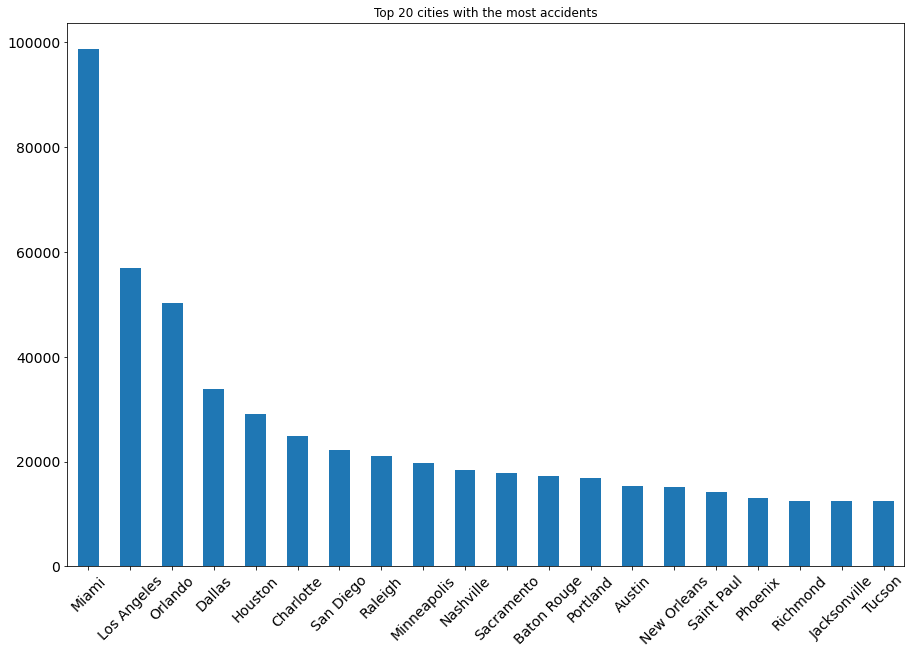

In [31]:
accidents['City'].value_counts().head(20).plot.bar(title='Top 20 cities with the most accidents',figsize=(15,10))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.show()

In [32]:
"""plt.figure(figsize=(15,10))
a=sns.countplot(orient="v",x="City", hue="Severity", data=accidents,order=accidents.City.value_counts().iloc[:10].index,palette=['tab:green', 'tab:blue', 'tab:orange', 'tab:red'])
for label in (a.get_xticklabels() + a.get_yticklabels()):
    label.set_fontsize(15)
   
#a.set_xlabel("City",fontsize=12)
#a.set_ylabel("Number of Accidents",fontsize=12)
a.set_title('Top 20 cities with the most accidents.',fontsize=20)"""

'plt.figure(figsize=(15,10))\na=sns.countplot(orient="v",x="City", hue="Severity", data=accidents,order=accidents.City.value_counts().iloc[:10].index,palette=[\'tab:green\', \'tab:blue\', \'tab:orange\', \'tab:red\'])\nfor label in (a.get_xticklabels() + a.get_yticklabels()):\n    label.set_fontsize(15)\n   \n#a.set_xlabel("City",fontsize=12)\n#a.set_ylabel("Number of Accidents",fontsize=12)\na.set_title(\'Top 20 cities with the most accidents.\',fontsize=20)'

In [33]:
"""plt.figure(figsize=(15,10))
sns.countplot(orient="v",x="State", hue="Severity", data=accidents,order=accidents.State.value_counts().iloc[:10].index,palette=['tab:green', 'tab:blue', 'tab:orange', 'tab:red'])

"""

'plt.figure(figsize=(15,10))\nsns.countplot(orient="v",x="State", hue="Severity", data=accidents,order=accidents.State.value_counts().iloc[:10].index,palette=[\'tab:green\', \'tab:blue\', \'tab:orange\', \'tab:red\'])\n\n'

In [34]:
#accidents['Severity'].value_counts().plot.bar()

In [35]:

#plt.show()

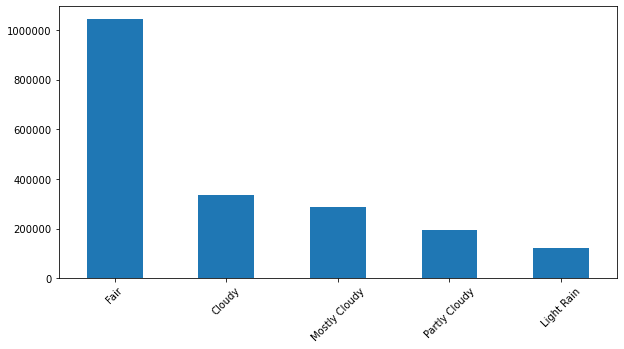

In [36]:
accidents['Weather_Condition'].value_counts().head(5).plot.bar(figsize=(10,5),rot=45)
plt.ticklabel_format(style='plain', axis='y')

In [37]:
#miami=accidents[accidents['City']=='Miami']

In [38]:
#miami['Street'].value_counts().head().plot.bar()

In [39]:
#los_angeles=accidents[accidents['City']=='Los Angeles']

In [40]:
#los_angeles['Street'].value_counts().head(20).plot.bar()

<AxesSubplot:xlabel='Humidity(%)', ylabel='Density'>

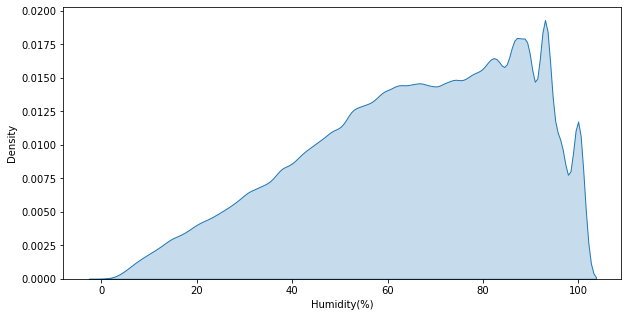

In [42]:
plt.figure(figsize = (10,5))
sns.kdeplot(accidents["Humidity(%)"],shade=True)


Text(0.5, 1.0, 'Severity on Accidents')

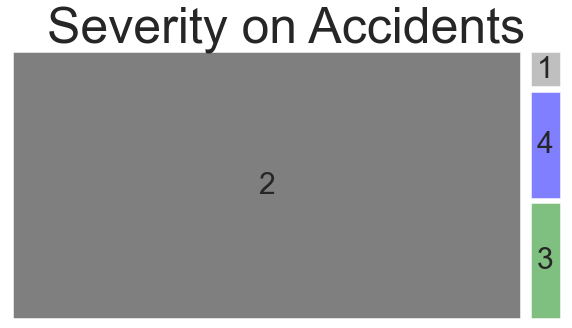

In [103]:
import squarify

sizes= accidents["Severity"].value_counts()# proportions of the categories
plt.figure(figsize = (10,5))
squarify.plot(sizes=sizes,label=sizes.index,color=["Black","green","blue", "grey"],alpha=0.5,pad=True,text_kwargs={'fontsize':30})
plt.axis('off')
plt.title("Severity on Accidents",fontsize=50)

<Figure size 720x360 with 0 Axes>

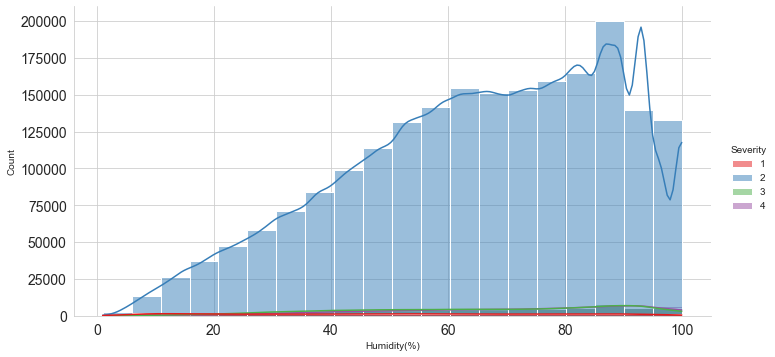

In [115]:
plt.figure(figsize = (10,5))
sns.displot(accidents, x="Humidity(%)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

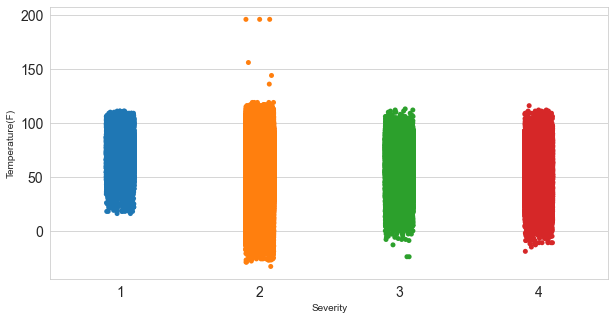

In [119]:
plt.figure(figsize = (10,5))
sns.stripplot(x=accidents['Severity'],y=accidents['Temperature(F)'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

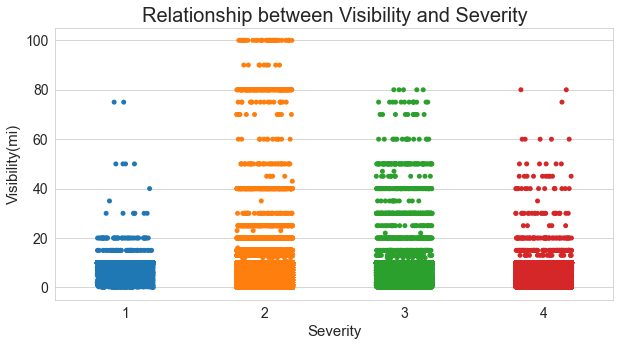

In [120]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('Relationship between Visibility and Severity', size=20)
plt.ylabel('Visibility(mi)', fontsize=15)
plt.xlabel('Severity', fontsize=15)
sns.stripplot(x=accidents['Severity'],y=accidents['Visibility(mi)'],data=accidents,jitter=0.2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

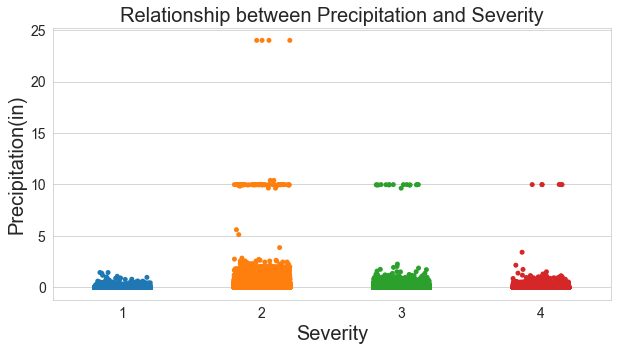

In [121]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('Relationship between Precipitation and Severity', size=20)
plt.ylabel('Precipitation(in)', fontsize=20)
plt.xlabel('Severity', fontsize=20)
sns.stripplot(x=accidents['Severity'],y=accidents['Precipitation(in)'],data=accidents,jitter=0.2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()